In [1]:
print("GAN")

GAN


In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
tf.__version__

'1.14.0'

In [4]:
import math

In [5]:
def func_y(x):
    pi = 3.141592654
    return 0.5 + math.cos(0.2*pi*x)


def sample_data(n, scale):
    data = []

    x = scale*(np.random.random_sample((n,))-0.5)

    for i in range(n):
        yi = func_y(x[i])
        data.append([x[i],yi])

    return np.array(data)

In [6]:
#generate random t as gan network input
def sample_T(m, n):
    return np.random.uniform(-1., 2., size=[m, n])


In [7]:
def generator(G,hsize=[16, 16],reuse=False):
    with tf.variable_scope("GAN/Generator",reuse=reuse):
        h1 = tf.layers.dense(G,hsize[0],activation=tf.nn.leaky_relu)
        h2 = tf.layers.dense(h1,hsize[1],activation=tf.nn.leaky_relu)
        out = tf.layers.dense(h2,2)

    return out

def discriminator(D,hsize=[16, 16],reuse=False):
    with tf.variable_scope("GAN/Discriminator",reuse=reuse):
        h1 = tf.layers.dense(D,hsize[0],activation=tf.nn.leaky_relu)
        h2 = tf.layers.dense(h1,hsize[1],activation=tf.nn.leaky_relu)
        h3 = tf.layers.dense(h2,2)
        out = tf.layers.dense(h3,1)

    return out, h3

In [8]:
#input node of generator and discriminator

G = tf.placeholder(tf.float32,[None,1])
D = tf.placeholder(tf.float32,[None,2])

In [9]:
G_sample = generator(G,hsize=[128,256])
r_logits, r_rep = discriminator(D,hsize=[128,256])
f_logits, g_rep = discriminator(G_sample,hsize=[128,256],reuse=True)

Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [10]:
disc_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=r_logits,labels=tf.ones_like(r_logits)) + tf.nn.sigmoid_cross_entropy_with_logits(logits=f_logits,labels=tf.zeros_like(f_logits)))
gen_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=f_logits,labels=tf.ones_like(f_logits)))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [11]:
gen_vars = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES,scope="GAN/Generator")
disc_vars = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES,scope="GAN/Discriminator")

In [12]:
#Generator Train
gen_step = tf.train.RMSPropOptimizer(learning_rate=0.001).minimize(gen_loss,var_list = gen_vars)
#Discriminator Train
disc_step = tf.train.RMSPropOptimizer(learning_rate=0.001).minimize(disc_loss,var_list = disc_vars)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [13]:
sess = tf.Session()
tf.global_variables_initializer().run(session=sess)

batch_size = 1024
nd_steps = 10
ng_steps = 10

x_plot = sample_data(n=batch_size,scale=20)

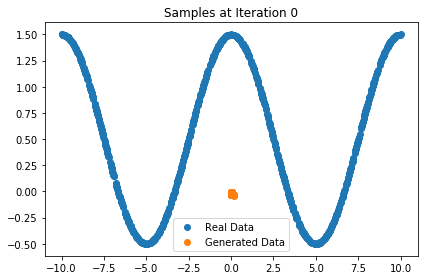

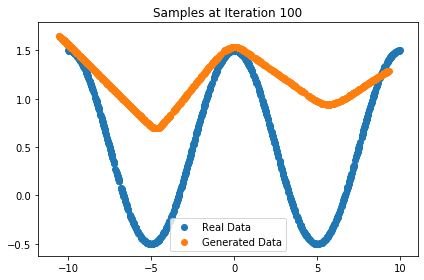

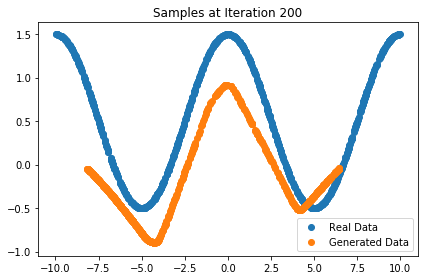

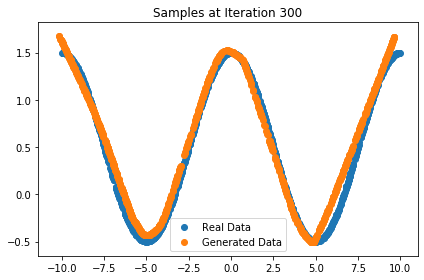

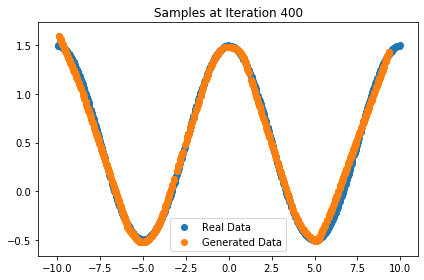

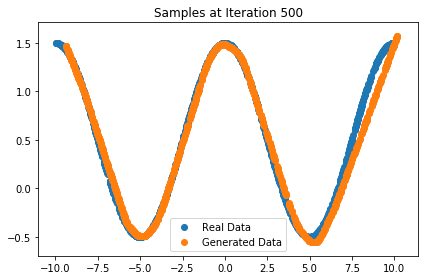

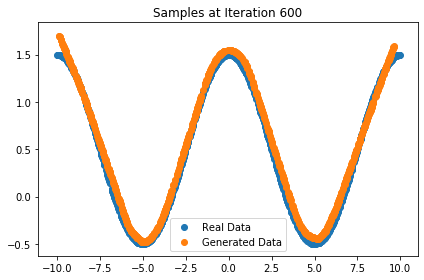

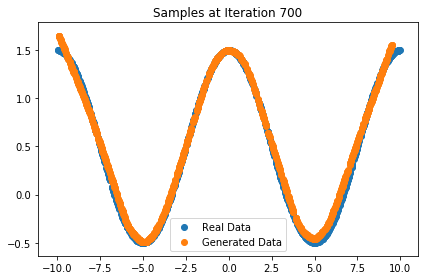

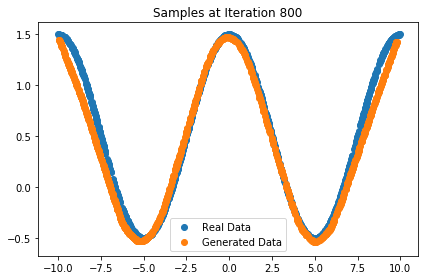

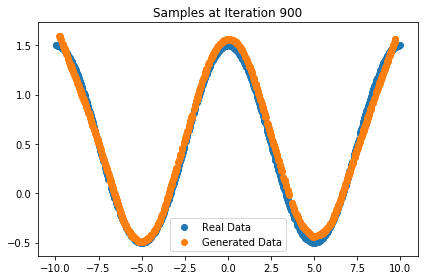

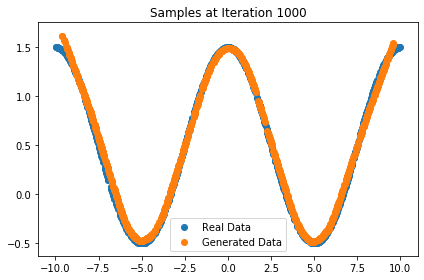

In [14]:
#total epoch
epoch = 1000
for i in range(epoch+1):
    D_batch = sample_data(batch_size,20)
    G_batch = sample_T(batch_size, 1)


    for _ in range(nd_steps):
        _, dloss = sess.run([disc_step, disc_loss], feed_dict={D: D_batch, G: G_batch})
    rrep_dstep, grep_dstep = sess.run([r_rep, g_rep], feed_dict={D: D_batch, G: G_batch})

    for _ in range(ng_steps):
        _, gloss = sess.run([gen_step, gen_loss], feed_dict={G: G_batch})

    rrep_gstep, grep_gstep = sess.run([r_rep, g_rep], feed_dict={D: D_batch, G: G_batch})

    #print("Iterations: %d\t Discriminator loss: %.4f\t Generator loss: %.4f"%(i,dloss,gloss))

    #plot the function, both real data and generated data
    if i%100 == 0:
        plt.figure()
        g_plot = sess.run(G_sample, feed_dict={G: G_batch})
        realfunc = plt.scatter(x_plot[:,0], x_plot[:,1])
        generatefunc = plt.scatter(g_plot[:,0],g_plot[:,1])

        plt.legend((realfunc,generatefunc), ("Real Data","Generated Data"))
        plt.title('Samples at Iteration %d'%i)
        plt.tight_layout()
        plt.show()



'''
modify t
'''

In [15]:
def sample_Tmod(m, n):
    return np.random.uniform(-30., 50., size=[m, n])

In [16]:
def generator(G,hsize=[16, 16],reuse=False):
    with tf.variable_scope("GAN/Generator2",reuse=reuse):
        h1 = tf.layers.dense(G,hsize[0],activation=tf.nn.leaky_relu)
        h2 = tf.layers.dense(h1,hsize[1],activation=tf.nn.leaky_relu)
        out = tf.layers.dense(h2,2)

    return out

def discriminator(D,hsize=[16, 16],reuse=False):
    with tf.variable_scope("GAN/Discriminator2",reuse=reuse):
        h1 = tf.layers.dense(D,hsize[0],activation=tf.nn.leaky_relu)
        h2 = tf.layers.dense(h1,hsize[1],activation=tf.nn.leaky_relu)
        h3 = tf.layers.dense(h2,2)
        out = tf.layers.dense(h3,1)

    return out, h3

In [17]:
#input node of generator and discriminator

G2 = tf.placeholder(tf.float32,[None,1])
D2 = tf.placeholder(tf.float32,[None,2])

G_sample = generator(G2,hsize=[128,256])
r_logits, r_rep = discriminator(D2,hsize=[128,256])
f_logits, g_rep = discriminator(G_sample,hsize=[128,256],reuse=True)

disc_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=r_logits,labels=tf.ones_like(r_logits)) + tf.nn.sigmoid_cross_entropy_with_logits(logits=f_logits,labels=tf.zeros_like(f_logits)))
gen_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=f_logits,labels=tf.ones_like(f_logits)))

gen_vars = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES,scope="GAN/Generator2")
disc_vars = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES,scope="GAN/Discriminator2")

#Generator Train
gen_step = tf.train.RMSPropOptimizer(learning_rate=0.001).minimize(gen_loss,var_list = gen_vars)
#Discriminator Train
disc_step = tf.train.RMSPropOptimizer(learning_rate=0.001).minimize(disc_loss,var_list = disc_vars)



In [18]:
sess = tf.Session()
tf.global_variables_initializer().run(session=sess)

batch_size = 1024
nd_steps = 10
ng_steps = 10

x_plot = sample_data(n=batch_size,scale=20)

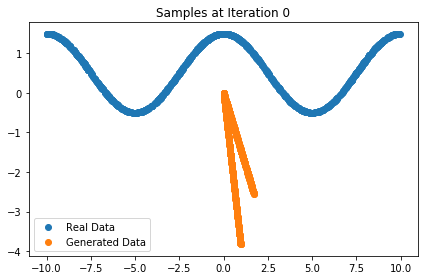

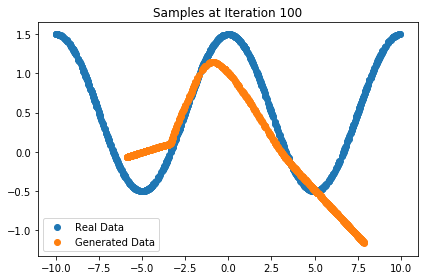

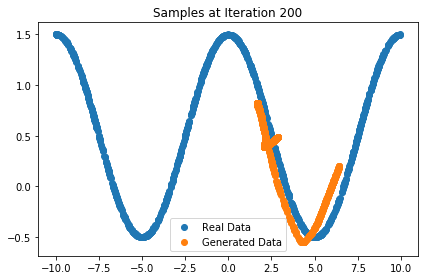

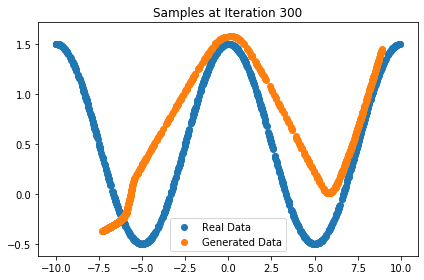

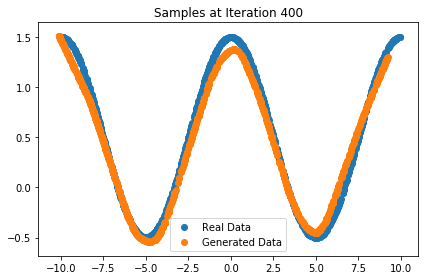

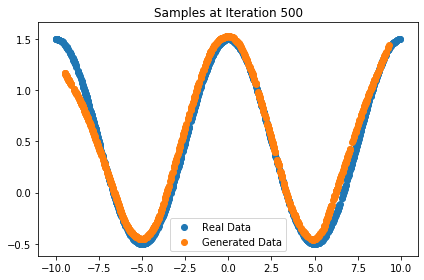

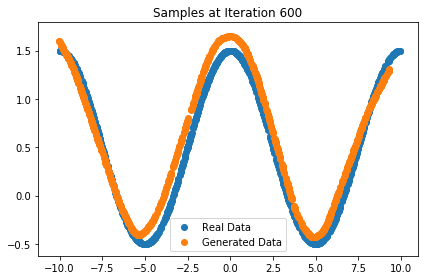

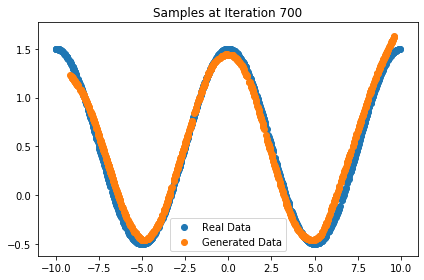

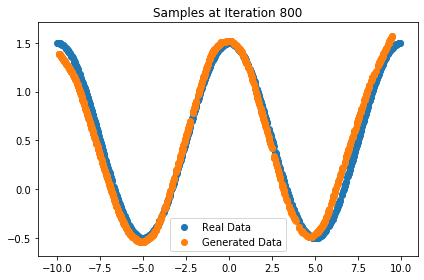

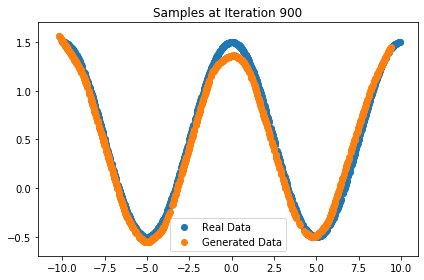

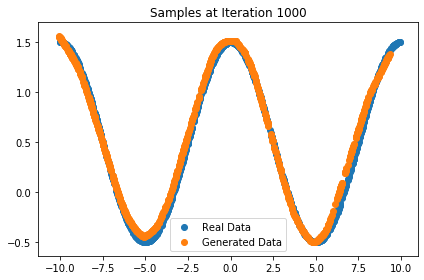

In [19]:
#total epoch
epoch = 1000
for i in range(epoch+1):
    D_batch = sample_data(batch_size,20)
    G_batch = sample_Tmod(batch_size, 1)


    for _ in range(nd_steps):
        _, dloss = sess.run([disc_step, disc_loss], feed_dict={D2: D_batch, G2: G_batch})
    rrep_dstep, grep_dstep = sess.run([r_rep, g_rep], feed_dict={D2: D_batch, G2: G_batch})

    for _ in range(ng_steps):
        _, gloss = sess.run([gen_step, gen_loss], feed_dict={G2: G_batch})

    rrep_gstep, grep_gstep = sess.run([r_rep, g_rep], feed_dict={D2: D_batch, G2: G_batch})

    #print("Iterations: %d\t Discriminator loss: %.4f\t Generator loss: %.4f"%(i,dloss,gloss))

    #plot the function, both real data and generated data
    if i%100 == 0:
        plt.figure()
        g_plot = sess.run(G_sample, feed_dict={G2: G_batch})
        realfunc = plt.scatter(x_plot[:,0], x_plot[:,1])
        generatefunc = plt.scatter(g_plot[:,0],g_plot[:,1])

        plt.legend((realfunc,generatefunc), ("Real Data","Generated Data"))
        plt.title('Samples at Iteration %d'%i)
        plt.tight_layout()
        plt.show()



In [ ]:
'''
less training data
'''

In [20]:
def generator(G,hsize=[16, 16],reuse=False):
    with tf.variable_scope("GAN/Generator3",reuse=reuse):
        h1 = tf.layers.dense(G,hsize[0],activation=tf.nn.leaky_relu)
        h2 = tf.layers.dense(h1,hsize[1],activation=tf.nn.leaky_relu)
        out = tf.layers.dense(h2,2)

    return out

def discriminator(D,hsize=[16, 16],reuse=False):
    with tf.variable_scope("GAN/Discriminator3",reuse=reuse):
        h1 = tf.layers.dense(D,hsize[0],activation=tf.nn.leaky_relu)
        h2 = tf.layers.dense(h1,hsize[1],activation=tf.nn.leaky_relu)
        h3 = tf.layers.dense(h2,2)
        out = tf.layers.dense(h3,1)

    return out, h3

In [21]:
#input node of generator and discriminator

G3 = tf.placeholder(tf.float32,[None,1])
D3 = tf.placeholder(tf.float32,[None,2])

G_sample = generator(G2,hsize=[128,256])
r_logits, r_rep = discriminator(D2,hsize=[128,256])
f_logits, g_rep = discriminator(G_sample,hsize=[128,256],reuse=True)

disc_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=r_logits,labels=tf.ones_like(r_logits)) + tf.nn.sigmoid_cross_entropy_with_logits(logits=f_logits,labels=tf.zeros_like(f_logits)))
gen_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=f_logits,labels=tf.ones_like(f_logits)))

gen_vars = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES,scope="GAN/Generator3")
disc_vars = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES,scope="GAN/Discriminator3")

#Generator Train
gen_step = tf.train.RMSPropOptimizer(learning_rate=0.001).minimize(gen_loss,var_list = gen_vars)
#Discriminator Train
disc_step = tf.train.RMSPropOptimizer(learning_rate=0.001).minimize(disc_loss,var_list = disc_vars)



In [33]:
sess = tf.Session()
tf.global_variables_initializer().run(session=sess)

batch_size = 120
nd_steps = 10
ng_steps = 10

x_plot = sample_data(n=240,scale=20)

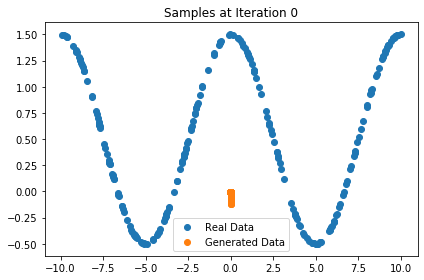

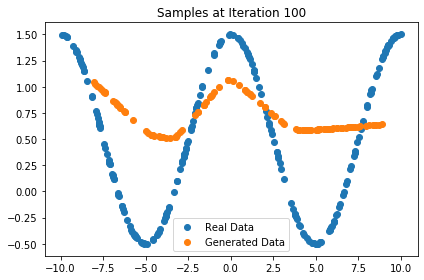

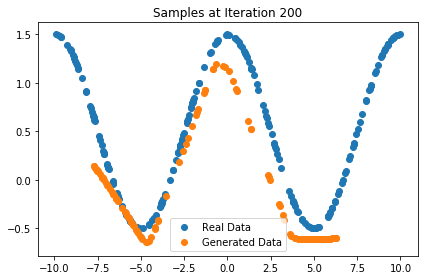

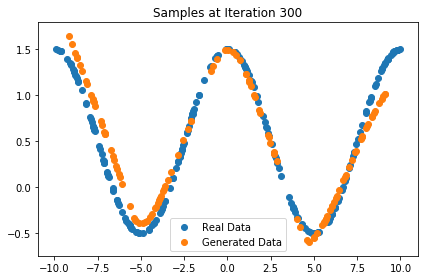

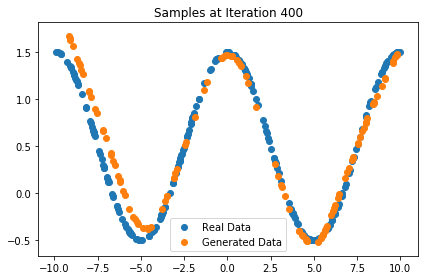

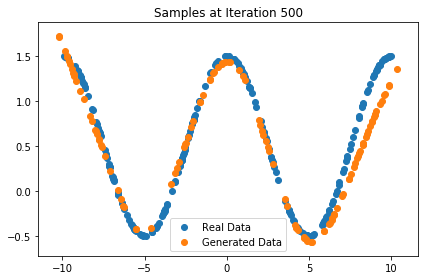

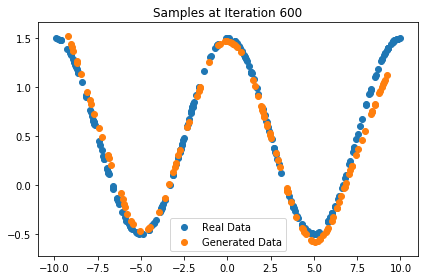

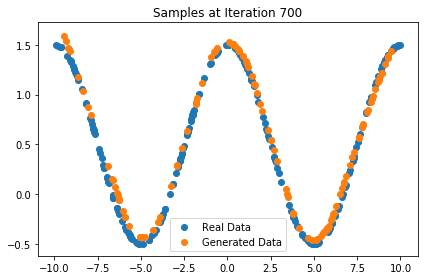

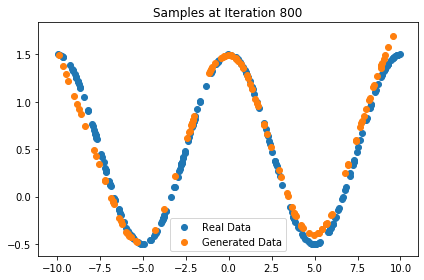

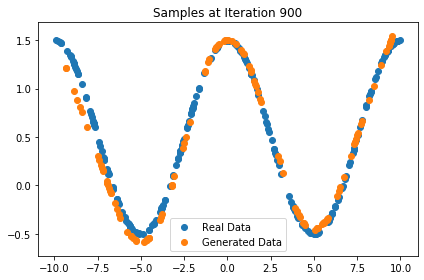

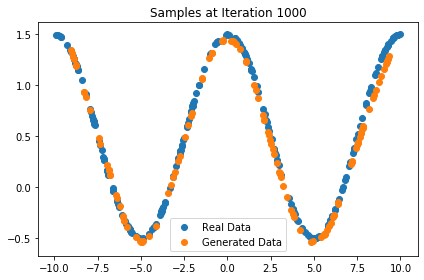

In [34]:
#total epoch
epoch = 1000
for i in range(epoch+1):
    D_batch = sample_data(batch_size,20)
    G_batch = sample_T(batch_size, 1)


    for _ in range(nd_steps):
        _, dloss = sess.run([disc_step, disc_loss], feed_dict={D2: D_batch, G2: G_batch})
    rrep_dstep, grep_dstep = sess.run([r_rep, g_rep], feed_dict={D2: D_batch, G2: G_batch})

    for _ in range(ng_steps):
        _, gloss = sess.run([gen_step, gen_loss], feed_dict={G2: G_batch})

    rrep_gstep, grep_gstep = sess.run([r_rep, g_rep], feed_dict={D2: D_batch, G2: G_batch})

    #print("Iterations: %d\t Discriminator loss: %.4f\t Generator loss: %.4f"%(i,dloss,gloss))

    #plot the function, both real data and generated data
    if i%100 == 0:
        plt.figure()
        g_plot = sess.run(G_sample, feed_dict={G2: G_batch})
        realfunc = plt.scatter(x_plot[:,0], x_plot[:,1])
        generatefunc = plt.scatter(g_plot[:,0],g_plot[:,1])

        plt.legend((realfunc,generatefunc), ("Real Data","Generated Data"))
        plt.title('Samples at Iteration %d'%i)
        plt.tight_layout()
        plt.show()



In [ ]:
'''
try other function x2 - 0.2 * x1 * x1= 0.5 
'''

In [44]:
def func_ynew(x):
    return 0.5 + 0.2 * x * x


def sample_datanew(n, scale):
    data = []

    x = scale*(np.random.random_sample((n,))-0.5)

    for i in range(n):
        yi = func_ynew(x[i])
        data.append([x[i],yi])

    return np.array(data)

In [37]:
def generator(G,hsize=[16, 16],reuse=False):
    with tf.variable_scope("GAN/Generator4",reuse=reuse):
        h1 = tf.layers.dense(G,hsize[0],activation=tf.nn.leaky_relu)
        h2 = tf.layers.dense(h1,hsize[1],activation=tf.nn.leaky_relu)
        out = tf.layers.dense(h2,2)

    return out

def discriminator(D,hsize=[16, 16],reuse=False):
    with tf.variable_scope("GAN/Discriminator4",reuse=reuse):
        h1 = tf.layers.dense(D,hsize[0],activation=tf.nn.leaky_relu)
        h2 = tf.layers.dense(h1,hsize[1],activation=tf.nn.leaky_relu)
        h3 = tf.layers.dense(h2,2)
        out = tf.layers.dense(h3,1)

    return out, h3

In [38]:
#input node of generator and discriminator

G4 = tf.placeholder(tf.float32,[None,1])
D4 = tf.placeholder(tf.float32,[None,2])

G_sample = generator(G4,hsize=[128,256])
r_logits, r_rep = discriminator(D4,hsize=[128,256])
f_logits, g_rep = discriminator(G_sample,hsize=[128,256],reuse=True)

disc_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=r_logits,labels=tf.ones_like(r_logits)) + tf.nn.sigmoid_cross_entropy_with_logits(logits=f_logits,labels=tf.zeros_like(f_logits)))
gen_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=f_logits,labels=tf.ones_like(f_logits)))

gen_vars = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES,scope="GAN/Generator4")
disc_vars = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES,scope="GAN/Discriminator4")

#Generator Train
gen_step = tf.train.RMSPropOptimizer(learning_rate=0.001).minimize(gen_loss,var_list = gen_vars)
#Discriminator Train
disc_step = tf.train.RMSPropOptimizer(learning_rate=0.001).minimize(disc_loss,var_list = disc_vars)



In [46]:
sess = tf.Session()
tf.global_variables_initializer().run(session=sess)

batch_size = 1024
nd_steps = 10
ng_steps = 10

x_plot = sample_datanew(n=batch_size,scale=20)

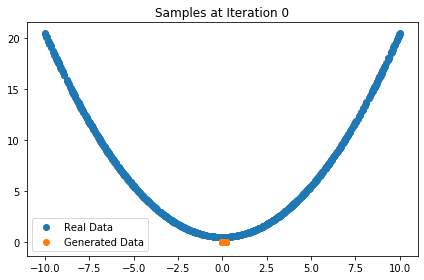

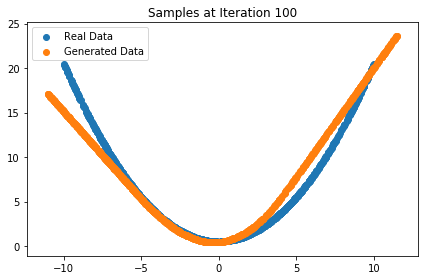

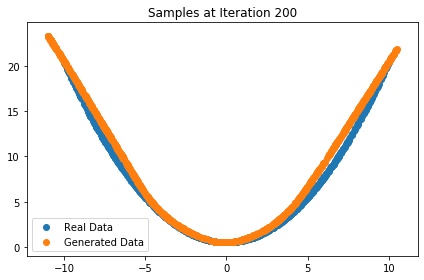

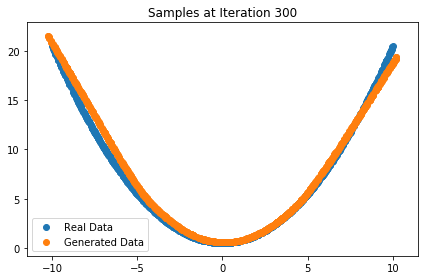

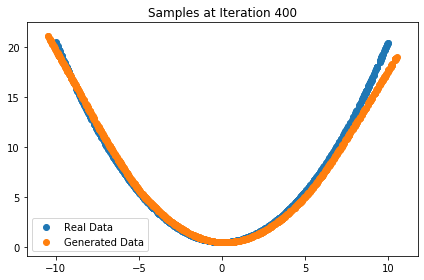

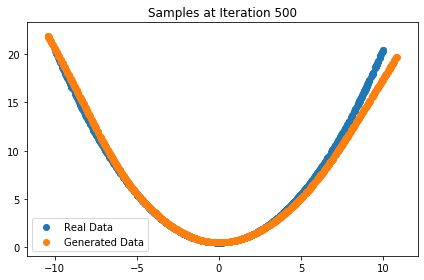

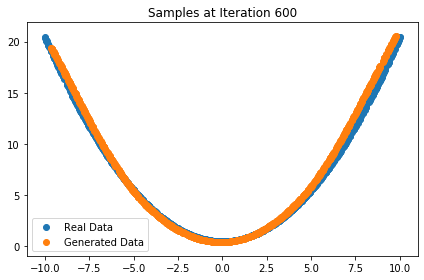

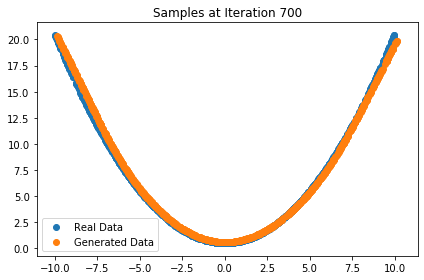

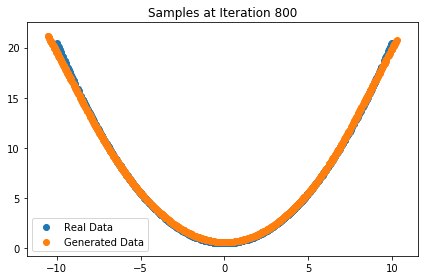

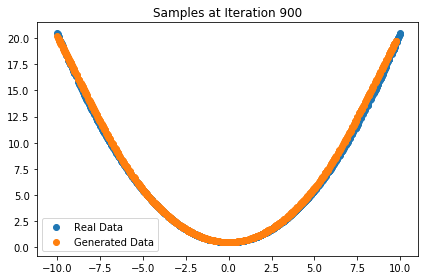

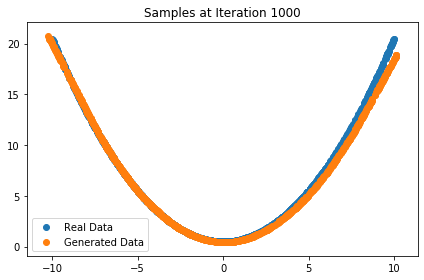

In [47]:
#total epoch
epoch = 1000
for i in range(epoch+1):
    D_batch = sample_datanew(batch_size,20)
    G_batch = sample_T(batch_size, 1)


    for _ in range(nd_steps):
        _, dloss = sess.run([disc_step, disc_loss], feed_dict={D4: D_batch, G4: G_batch})
    rrep_dstep, grep_dstep = sess.run([r_rep, g_rep], feed_dict={D4: D_batch, G4: G_batch})

    for _ in range(ng_steps):
        _, gloss = sess.run([gen_step, gen_loss], feed_dict={G4: G_batch})

    rrep_gstep, grep_gstep = sess.run([r_rep, g_rep], feed_dict={D4: D_batch, G4: G_batch})

    #print("Iterations: %d\t Discriminator loss: %.4f\t Generator loss: %.4f"%(i,dloss,gloss))

    #plot the function, both real data and generated data
    if i%100 == 0:
        plt.figure()
        g_plot = sess.run(G_sample, feed_dict={G4: G_batch})
        realfunc = plt.scatter(x_plot[:,0], x_plot[:,1])
        generatefunc = plt.scatter(g_plot[:,0],g_plot[:,1])

        plt.legend((realfunc,generatefunc), ("Real Data","Generated Data"))
        plt.title('Samples at Iteration %d'%i)
        plt.tight_layout()
        plt.show()



In [ ]:
'''
YOLOv3的應用
我們期末打算利用YOLOv3做出一個成品
用來偵測影片中非法改裝之車輛
'''